<a href="https://colab.research.google.com/github/anacarolinasm1609/anacarolinasm1609/blob/main/Hidden_layers_carvao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [186]:
# Bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing
from sklearn.metrics import r2_score 
from google.colab import files

In [187]:
# Gerar grafico no browser
%matplotlib inline

In [188]:
!git clone https://github.com/anacarolinasm1609/anacarolinasm1609
%cd anacarolinasm1609

Cloning into 'anacarolinasm1609'...
remote: Enumerating objects: 30, done.
remote: Counting objects: 100% (30/30), done.
remote: Compressing objects: 100% (30/30), done.
remote: Total 30 (delta 15), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (30/30), done.
/content/anacarolinasm1609/anacarolinasm1609/anacarolinasm1609/anacarolinasm1609/anacarolinasm1609/anacarolinasm1609/anacarolinasm1609/anacarolinasm1609/anacarolinasm1609/anacarolinasm1609/anacarolinasm1609


In [189]:
# Leitura dos dados
df=pd.read_csv("Paper_Carvao_China_abril_12_2016.csv")

In [190]:
# Leitura das cinco primeiras linhas da tabela
df.head(5)

,Unnamed: 0,Cod,Water,Ash,Volatil,FixC,NetCal,Carbon,Hydrog,Nitro,Sulfur,Oxygen,TC,Ea
0,1,LL,4.19,19.45,33.19,43.17,23.91,59.22,4.08,1.02,4.38,7.66,435,170.1
1,2,YY,1.06,20.46,31.53,46.94,23.91,64.22,4.63,1.38,0.74,7.51,451,206.6
2,3,SF,6.60,9.56,31.49,52.35,26.22,66.34,3.61,0.95,0.38,12.56,431,273.5
3,4,YM,9.47,14.19,30.02,46.32,23.80,58.44,2.92,0.83,0.44,13.71,403,160.8
4,5,ZZ,1.84,18.10,29.43,50.63,27.73,65.88,4.06,1.22,0.88,8.02,466,228.4


In [191]:
# Leitura das cinco ultimas linhas da tabela
df.tail(5)

,Unnamed: 0,Cod,Water,Ash,Volatil,FixC,NetCal,Carbon,Hydrog,Nitro,Sulfur,Oxygen,TC,Ea
59,60,DU4PX2LQ4,1.84,30.82,15.93,51.51,22.46,57.02,3.10,1.00,0.73,5.49,475,250.1
60,61,XW2HN4LQ4,1.92,20.56,19.55,57.97,26.11,66.64,3.58,1.15,0.60,5.55,475,252.8
61,62,YM4LA4JC2,5.70,16.22,19.05,59.03,25.28,66.86,3.32,1.16,0.39,6.35,408,176.4
62,63,YY2HN4LQ4,2.02,20.02,19.57,58.40,25.26,66.78,3.62,1.17,0.54,5.85,475,252.4
63,64,YY2PX2LA6,2.05,19.30,17.23,61.42,26.70,68.15,3.50,1.23,0.62,5.15,481,256.0


In [192]:
Dat_Select=df.iloc[:,2:]

In [193]:
Dat_Select.head(5)

,Water,Ash,Volatil,FixC,NetCal,Carbon,Hydrog,Nitro,Sulfur,Oxygen,TC,Ea
0,4.19,19.45,33.19,43.17,23.91,59.22,4.08,1.02,4.38,7.66,435,170.1
1,1.06,20.46,31.53,46.94,23.91,64.22,4.63,1.38,0.74,7.51,451,206.6
2,6.60,9.56,31.49,52.35,26.22,66.34,3.61,0.95,0.38,12.56,431,273.5
3,9.47,14.19,30.02,46.32,23.80,58.44,2.92,0.83,0.44,13.71,403,160.8
4,1.84,18.10,29.43,50.63,27.73,65.88,4.06,1.22,0.88,8.02,466,228.4


In [194]:
# Separa os dados em normatizados e originais
X = Dat_Select[['Water','Ash','Volatil','FixC']]
y = np.array(Dat_Select[['NetCal']]).reshape(-1,1)

In [195]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20, shuffle=True, random_state=3)

In [196]:
scaler_X = preprocessing.MinMaxScaler((-1,1)).fit(X)
scaler_Y = preprocessing.MinMaxScaler((-1,1)).fit(y)

In [197]:
X_train = scaler_X.transform(X_train)
X_test = scaler_X.transform(X_test)
y_train = scaler_Y.transform(y_train)
y_test = scaler_Y.transform(y_test)

In [198]:
HN1 =[]
train_R2 =[]
test_R2 =[]
for i in range(5,30):
    # define a rede neural 
    model = MLPRegressor(solver='lbfgs',activation='tanh',alpha=1e-5,hidden_layer_sizes=(i),
                         random_state=11,max_iter=2500)
    # treina a rede neural
    model.fit(X_train, y_train)
    # usa a rede neural treina em calculos para treino e teste
    y_calc_train=model.predict(X_train)
    y_calc_test=model.predict(X_test)
    # transforma dos dados calculados na forma original (nao normatizado)
    y_obs_train=scaler_Y.inverse_transform(np.array(y_train).reshape(-1,1))
    y_obs_test=scaler_Y.inverse_transform(np.array(y_test).reshape(-1,1))
    y_calc_train=scaler_Y.inverse_transform(y_calc_train.reshape(-1,1))
    y_calc_test=scaler_Y.inverse_transform(y_calc_test.reshape(-1,1))
    mse=mean_squared_error(y_obs_test,y_calc_test)
    R2_teste=r2_score(y_obs_test,y_calc_test)
    R2_treino=r2_score(y_obs_train,y_calc_train)
    #print("i=",i"R^2 treino=",R2_treino,"R^2 teste=",R2_teste)
    HN1.append(i)
    train_R2.append(R2_treino)
    test_R2.append(R2_teste)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when 

In [199]:
df = pd.DataFrame({'camada 1':HN1,'R2 treino':train_R2,'R2 teste':test_R2})

In [200]:
pd.set_option('display.max_rows', None)
print(df)

    camada 1  R2 treino  R2 teste
0          5   0.972317  0.541071
1          6   0.979709  0.406485
2          7   0.988717  0.299142
3          8   0.982024  0.744190
4          9   0.985151  0.842187
5         10   0.989384  0.723895
6         11   0.995777 -5.721836
7         12   0.982742  0.822024
8         13   0.985352  0.898258
9         14   0.984829  0.157433
10        15   0.985161  0.562956
11        16   0.987661  0.705030
12        17   0.995496 -0.111258
13        18   0.979241  0.859640
14        19   0.997549 -0.445709
15        20   0.997400 -2.090467
16        21   0.982671  0.632724
17        22   0.998074 -2.554859
18        23   0.997933  0.132784
19        24   0.997723 -0.016028
20        25   0.980375  0.372455
21        26   0.996989  0.665430
22        27   0.986786  0.693480
23        28   0.986722  0.551370
24        29   0.996848 -2.255885


In [201]:
rows, cols =df.shape

In [202]:
melhor = 0
place = 0

rteste1=0


for i in range(rows):
  rtreino =df.iloc[i,1]
  rteste =df.iloc[i,2]
  if(rteste > rteste1 ):
      melhor = rtreino
      place = i
      rteste1 = rteste
          
print('place',place)
print(df.iloc[place,:])


place 8
camada 1     13.000000
R2 treino     0.985352
R2 teste      0.898258
Name: 8, dtype: float64


In [203]:
 # define a rede neural 
model = MLPRegressor(solver='lbfgs',activation='tanh',alpha=1e-5,hidden_layer_sizes=(place+5),
                         random_state=11,max_iter=2500) # verificar como inserir hidden layers
  # treina a rede neural
model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPRegressor(activation='tanh', alpha=1e-05, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=13, learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=2500,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=11, shuffle=True, solver='lbfgs',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

In [204]:
# Rede neural - calculos para treino e teste
y_calc_train=model.predict(X_train)
y_calc_test=model.predict(X_test)

In [205]:
# Dados voltam para forma original (nao-normatizado)
y_obs_train=scaler_Y.inverse_transform(np.array(y_train).reshape(-1,1))
y_obs_test=scaler_Y.inverse_transform(np.array(y_test).reshape(-1,1))
y_calc_train=scaler_Y.inverse_transform(y_calc_train.reshape(-1,1))
y_calc_test=scaler_Y.inverse_transform(y_calc_test.reshape(-1,1))

In [206]:
print(pd.DataFrame({'test calc':y_calc_test.ravel(),'test true':y_obs_test.ravel()}))

    test calc  test true
0   18.910913      19.02
1   22.019773      22.44
2   24.419624      24.97
3   25.462173      26.11
4   23.478739      23.82
5   24.279227      24.89
6   25.497602      23.86
7   24.304206      24.47
8   23.320258      22.54
9   28.608882      27.75
10  25.031709      24.67
11  20.787502      20.20
12  24.799667      24.04


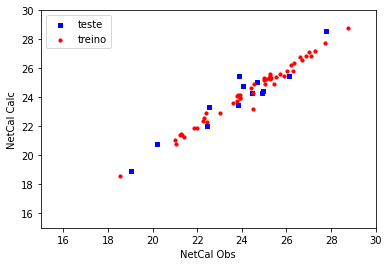

In [207]:
# Expressa os dois dados em figura
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(y_obs_test,y_calc_test, s=10, c='b', marker="s", label='teste')
ax1.scatter(y_obs_train,y_calc_train, s=10, c='r', marker="o", label='treino')
plt.legend(loc='upper left')
plt.xlim([15,30])
plt.ylim([15,30])
plt.ylabel('NetCal Calc')
plt.xlabel('NetCal Obs')
plt.show()

In [208]:
mse=mean_squared_error(y_obs_test,y_calc_test)
print("MSE teste=",mse)
R2=r2_score(y_obs_test,y_calc_test)
print("R^2 teste=",R2)

MSE teste= 0.5007216297608726
R^2 teste= 0.8982575836390776


In [209]:
mse=mean_squared_error(y_obs_train,y_calc_train)
print("MSE treino=",mse)
R2=r2_score(y_obs_train,y_calc_train)
print("R^2 treino=",R2)

MSE treino= 0.07490358661953783
R^2 treino= 0.9853523945655498
